# Data Preprocessing on a Real Dataset

Group members: Martin Bratoi, Georgios Terzidis, Vinay Bommenahalli Gurubasappa, Sharvari Santosh Shewdikar, Haaris Khalil
<br>Before being able to run the program, please unzip the fire_data_last_2_years.zip

🎯 Objective

In this group exercise, you will apply data preprocessing techniques learned in Chapter 2 to a real-world dataset. The goal is to understand how raw data is prepared before applying machine learning models.

👥 Group Work Rules

Work in groups of 3–5 students

Only one group representative submits the work

All group members’ names must be clearly listed in the notebook and GitHub repository

📊 Dataset Requirements
Each group must select one real dataset from sources such as:

- Kaggle

- UCI Machine Learning Repository

- Open government data portals

The dataset must:

- Contain numerical and/or categorical features

- Include missing values and/or potential outliers

- Have at least 100 records

Provide:

- Dataset name

- Source link

- Short description (2–3 lines)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

Dataset of US wildfires

Source: https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires

Data was filtered to last 2 years and converted to CSV for manageability

Feature descriptions available at the source link

In [3]:
# Load the raw wildfire dataset
df = pd.read_csv('fire_data_last_2_years.csv')
df.head()

/var/folders/n6/lnwmrfbj22z5dwxf2j15l_xh0000gn/T/ipykernel_3138/4146011757.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fire_data_last_2_years.csv')


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1721941,300000001,FS-1524899,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,...,A,45.340833,-116.466667,5.0,USFS,ID,Idaho,49.0,Idaho,b'\x00\x01\xad\x10\x00\x00\x1cr\xe1\xdd\xdd\x1...
1,1721942,300000002,FS-1524894,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,...,A,45.505278,-116.425556,5.0,USFS,ID,Idaho,49.0,Idaho,"b'\x00\x01\xad\x10\x00\x00,5cM<\x1b]\xc0p?:\xf..."
2,1721943,300000003,FS-1524891,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,...,A,45.908056,-115.767778,5.0,USFS,ID,Idaho,49.0,Idaho,b'\x00\x01\xad\x10\x00\x00\x80\xeciE#\xf1\\\xc...
3,1721944,300000004,FS-1524900,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,...,A,45.840000,-115.966389,5.0,USFS,ID,Idaho,49.0,Idaho,b'\x00\x01\xad\x10\x00\x00 q\xc9P\xd9\xfd\\\xc...
4,1721945,300000005,FS-1522737,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,...,A,45.598333,-115.449167,5.0,USFS,ID,Idaho,49.0,Idaho,b'\x00\x01\xad\x10\x00\x00\x98\x86\x8f%\xbf\xd...


# 1️⃣ Handling Missing Values

- Identify missing values

- Apply appropriate imputation methods (mean, median, mode, or justified alternative)

In [4]:
# Check dataset features and identify missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142244 entries, 0 to 142243
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OBJECTID                    142244 non-null  int64  
 1   FOD_ID                      142244 non-null  int64  
 2   FPA_ID                      142244 non-null  object 
 3   SOURCE_SYSTEM_TYPE          142244 non-null  object 
 4   SOURCE_SYSTEM               142244 non-null  object 
 5   NWCG_REPORTING_AGENCY       142244 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      142244 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    142244 non-null  object 
 8   SOURCE_REPORTING_UNIT       142244 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME  142244 non-null  object 
 10  LOCAL_FIRE_REPORT_ID        25559 non-null   float64
 11  LOCAL_INCIDENT_ID           124354 non-null  object 
 12  FIRE_CODE                   30492 non-null   object 
 13  FIRE_NAME     

In [5]:
# Missing percentages (divide by total rows)
missing_pct = (df.isnull().sum() / len(df)) * 100
print(f"Column with Missing Value: {len(missing_pct[missing_pct > 0])}")
missing_pct[missing_pct > 0].sort_values(ascending=False)

Column with Missing Value: 16


COMPLEX_NAME               99.590141
MTBS_ID                    99.412981
MTBS_FIRE_NAME             99.412981
ICS_209_INCIDENT_NUMBER    98.029442
ICS_209_NAME               98.029442
LOCAL_FIRE_REPORT_ID       82.031580
FIRE_CODE                  78.563595
CONT_TIME                  28.097494
FIRE_NAME                  22.327831
DISCOVERY_TIME             20.784005
CONT_DATE                  19.431400
CONT_DOY                   19.431400
LOCAL_INCIDENT_ID          12.576980
COUNTY                     12.277495
FIPS_CODE                  12.277495
FIPS_NAME                  12.277495
dtype: float64

We will first remove columns that are not useful for analysis like:
- ID columns (OBJECTID, FOD_ID, etc.)
- Columns with >70% missing data
- Redundant columns

In [6]:
# Removing IDs and redundant columns
id_and_redundant_columns = [
    # Identifiers (no analytical value)
    'OBJECTID',
    'FPA_ID',
    'LOCAL_INCIDENT_ID',
    'LOCAL_FIRE_REPORT_ID',

    # Redundant
    'SOURCE_REPORTING_UNIT',      # Redundant with NWCG_REPORTING_UNIT_ID
    'SOURCE_REPORTING_UNIT_NAME',  # Redundant with NWCG_REPORTING_UNIT_NAME

    # Geometric/shape data (not useful for basic tabular analysis)
    'Shape'
]

df = df.drop(columns=id_and_redundant_columns)
print(f"After removing IDs/redundant: {len(df.columns)} columns")

After removing IDs/redundant: 32 columns


- FOD_ID is retained as a unique identifier as it allows each record to be traced back to the original data source for debugging or analysis.

- It will not be used as a model feature and is kept strictly for record-keeping purposes.

In [7]:
# We will drop all columns where more than 70% of the column value is missing
# They too sparse for reliable imputation
high_missing_columns = [
    'FIRE_CODE',                 # 78% missing
    'ICS_209_INCIDENT_NUMBER',   # 98% missing
    'ICS_209_NAME',              # 98% missing
    'MTBS_ID',                   # 99% missing
    'MTBS_FIRE_NAME',            # 99% missing
    'COMPLEX_NAME'               # 99% missing
]

df = df.drop(columns=high_missing_columns)
print(f"Remaining columns left: {len(df.columns)}")

Remaining columns left: 26


In [8]:
# Recalculate missing percentages after column removal
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct[missing_pct > 0].sort_values(ascending=False)

CONT_TIME         28.097494
FIRE_NAME         22.327831
DISCOVERY_TIME    20.784005
CONT_DATE         19.431400
CONT_DOY          19.431400
COUNTY            12.277495
FIPS_CODE         12.277495
FIPS_NAME         12.277495
dtype: float64

Now we investigate the why behind missing values to choose appropriate imputation strategies.

### Feature 1: CONT_DATE (Containment Date) / CONT_TIME (Containment Time) / CONT_DOY (Containment Day of Year)

In [9]:
# Check if CONT_DATE and CONT_DOY are always missing in the same records
print("CONT_DATE missing:", df['CONT_DATE'].isna().sum())
print("CONT_DOY missing:", df['CONT_DOY'].isna().sum())

# Check if they're missing in the exact same rows
both_missing = df['CONT_DATE'].isna() & df['CONT_DOY'].isna()
print("Both missing together:", both_missing.sum())

# Check if one is missing without the other
only_date_missing = df['CONT_DATE'].isna() & df['CONT_DOY'].notna()
only_doy_missing = df['CONT_DATE'].notna() & df['CONT_DOY'].isna()
print("Only CONT_DATE missing:", only_date_missing.sum())
print("Only CONT_DOY missing:", only_doy_missing.sum())

CONT_DATE missing: 27640
CONT_DOY missing: 27640
Both missing together: 27640
Only CONT_DATE missing: 0
Only CONT_DOY missing: 0


In [10]:
# How many CONT_DATE, CONT_DOY, and CONT_TIME are missing?
print("Number of missing values of:")
print("CONT_DATE:", df['CONT_DATE'].isna().sum())
print("CONT_DOY:", df['CONT_DOY'].isna().sum())
print("CONT_TIME:", df['CONT_TIME'].isna().sum())

# Check if they're missing in the same rows
missing_all = df[df['CONT_DATE'].isna() & df['CONT_DOY'].isna() & df['CONT_TIME'].isna()]
print(f"\n In {len(missing_all)} rows ALL three features are missing")

Number of missing values of:
CONT_DATE: 27640
CONT_DOY: 27640
CONT_TIME: 39967

 In 27640 rows ALL three features are missing


When CONT_DATE and CONT_DOY are missing, CONT_TIME is always missing too. However, there are 12,327 cases where we have a containment date and day of year but no containment time.


Distribution:
count    102277.000000
mean        947.538166
std         240.016076
min           0.000000
25%         822.000000
50%         960.000000
75%        1095.000000
max        1439.000000
Name: CONT_TIME_MINUTES, dtype: float64

Skewness: -0.8996040751822424


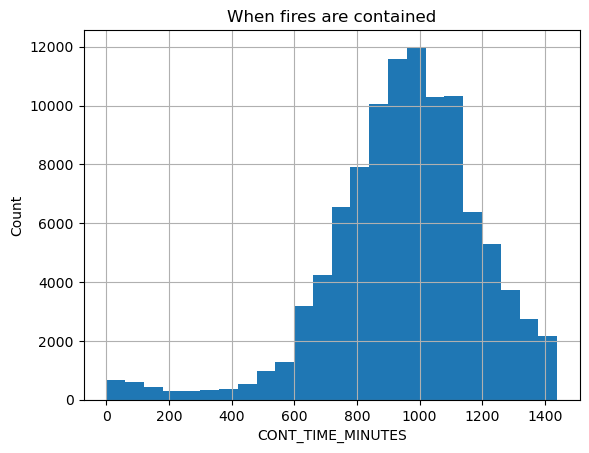

In [11]:
# Conversion of time to minutes
df['CONT_TIME_MINUTES'] = (df['CONT_TIME'] // 100) * 60 + (df['CONT_TIME'] % 100)

print("\nDistribution:")
print(df['CONT_TIME_MINUTES'].describe())

# Check skewness
print(f"\nSkewness: {df['CONT_TIME_MINUTES'].skew():}")

# Histogram with 24 bins (24 hours)
df['CONT_TIME_MINUTES'].hist(bins=24)
plt.xlabel('CONT_TIME_MINUTES')
plt.ylabel('Count')
plt.title('When fires are contained')
plt.show()

Records missing CONT_DATE and CONT_DOY will be removed because these fields share a 1:1 relationship and cannot be reconstructed without temporal modelling (out of scope). For the remaining ~12,000 rows where date information is present but CONT_TIME is missing, values will be imputed using Gaussian noise via a NumPy random number generator. This method is appropriate as the existing CONT_TIME data follows an approximately normal distribution.

In [12]:
# Drop rows with missing CONT_DATE/CONT_DOY
original_rows = len(df)
df = df.dropna(subset=['CONT_DATE', 'CONT_DOY'])
print(f"Dropped {original_rows - len(df)} rows with missing containment dates")
print(f"Remaining: {len(df)} rows ({len(df)/original_rows*100}%)")

# Impute missing CONT_TIME_MINUTES with Gaussian noise
missing_cont_minutes = df['CONT_TIME_MINUTES'].isna()
df.loc[missing_cont_minutes, 'CONT_TIME_MINUTES'] = np.random.normal(
    df['CONT_TIME_MINUTES'].mean(),
    df['CONT_TIME_MINUTES'].std(),
    missing_cont_minutes.sum()
)
print(f"\nImputed {missing_cont_minutes.sum()} missing CONT_TIME values")

# Convert back to original CONT_TIME format for consistency
df['CONT_TIME'] = (df['CONT_TIME_MINUTES'] // 60) * 100 + (df['CONT_TIME_MINUTES'] % 60)

Dropped 27640 rows with missing containment dates
Remaining: 114604 rows (80.56860043305869%)

Imputed 12327 missing CONT_TIME values


As a next step we will deal the feature FIRE_NAME

### Feature 2: FIRE_NAME

In [13]:
# Check FIRE_NAME uniqueness
print("Total Entries:", len(df))
print("Ratio of names that occur once:", round(df['FIRE_NAME'].nunique()/len(df), 5))
print("Top 10 fire names:")
print(df['FIRE_NAME'].value_counts().head(10))

# Check STAT_CAUSE_DESCR uniqueness for comparison
print("\nTotal Entries:", len(df))
print("Ratio of names that occur once:", round(df['STAT_CAUSE_DESCR'].nunique()/len(df), 5))
print("Top 10 fire names:")
print(df['STAT_CAUSE_DESCR'].value_counts().head(10))

Total Entries: 114604
Ratio of names that occur once: 0.60555
Top 10 fire names:
FIRE_NAME
PLYMOUTH      114
BROCKTON       82
QUINCY         77
WEYMOUTH       58
COTTONWOOD     54
BRAINTREE      53
CREEK          51
WILLOW         49
RIVER          48
ROCK           45
Name: count, dtype: int64

Total Entries: 114604
Ratio of names that occur once: 0.00011
Top 10 fire names:
STAT_CAUSE_DESCR
Debris Burning       28929
Miscellaneous        24252
Lightning            16519
Arson                12237
Missing/Undefined     8980
Equipment Use         7567
Campfire              6868
Children              2523
Smoking               2411
Powerline             1885
Name: count, dtype: int64


The FIRE_NAME column will be removed because it contains arbitrary descriptive labels with a 22% missingness rate and high uniqueness (60%), making it unsuitable for standardised analysis. Since STAT_CAUSE_DESCR provides formal cause categories and location data is already captured via FIPS_NAME and coordinates, the column is redundant for categorical or spatial modelling.

In [14]:
df = df.drop(columns=['FIRE_NAME'])
print(f"Remaining Columns: {len(df.columns)}")

Remaining Columns: 26


Following this we will analyse DISCOVERY_TIME

#### Feature 3: DISCOVERY_TIME

Has DISCOVERY_TIME: 104546
Missing DISCOVERY_TIME: 10058

Distribution:
count    104546.000000
mean        906.151914
std         228.920715
min           0.000000
25%         783.000000
50%         907.000000
75%        1045.000000
max        1439.000000
Name: DISCOVERY_TIME_MINUTES, dtype: float64

Skewness of DISCOVERY_TIME_MINUTES: -0.6449816257653104


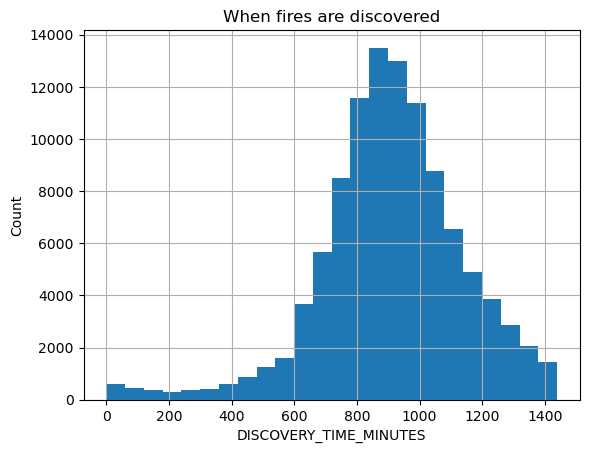

In [15]:
# Convertion of time to minutes
df['DISCOVERY_TIME_MINUTES'] = (df['DISCOVERY_TIME'] // 100) * 60 + (df['DISCOVERY_TIME'] % 100)

# Check missing count
print("Has DISCOVERY_TIME:", df['DISCOVERY_TIME_MINUTES'].notna().sum())
print("Missing DISCOVERY_TIME:", df['DISCOVERY_TIME_MINUTES'].isna().sum())
print("\nDistribution:")
print(df['DISCOVERY_TIME_MINUTES'].describe())

# Skewness of discovery time
skewness = df['DISCOVERY_TIME_MINUTES'].skew()
print("\nSkewness of DISCOVERY_TIME_MINUTES:", skewness)

# Histogram with 24 bins (24 hours in military time)
df['DISCOVERY_TIME_MINUTES'].hist(bins=24)
plt.xlabel('DISCOVERY_TIME_MINUTES')
plt.ylabel('Count')
plt.title('When fires are discovered')
plt.show()

The CONT_TIME variable exhibits an approximately normal distribution centered at 900 minutes (3:00 PM) with a skewness of roughly -0.64. Given the low rate of missingness (~7%), missing values will be imputed using Gaussian noise with a standard deviation of 228 minutes. This approach is justified because sampling from the existing distribution maintains realistic variance and preserves the statistical integrity of the time-of-day data.

In [16]:
missing_disc_minutes = df['DISCOVERY_TIME_MINUTES'].isna()
df.loc[missing_disc_minutes, 'DISCOVERY_TIME_MINUTES'] = np.random.normal(
    df['DISCOVERY_TIME_MINUTES'].mean(),
    df['DISCOVERY_TIME_MINUTES'].std(),
    missing_disc_minutes.sum()
    )

# Reverse encode back to discovery time
df['DISCOVERY_TIME'] = (df['DISCOVERY_TIME_MINUTES'] // 60) * 100 + (df['DISCOVERY_TIME_MINUTES'] % 60)

print(f"Filled {missing_disc_minutes.sum()} missing values with Gaussian noise")

Filled 10058 missing values with Gaussian noise


#### Feature 4: FIPS_CODE / FIPS_NAME

In [17]:
# Missing count
print("Missing FIPS_CODE:", df['FIPS_CODE'].isna().sum())
print("Missing FIPS_NAME:", df['FIPS_NAME'].isna().sum())

# Are both missing on the same row
both_missing = df['FIPS_CODE'].isna() & df['FIPS_NAME'].isna()
print("Both missing together:", both_missing.sum())

Missing FIPS_CODE: 16736
Missing FIPS_NAME: 16736
Both missing together: 16736


Rows missing FIPS codes will be removed because county-level location is essential for analysis, and the 15% missingness rate is too high for simple imputation. While broad location context remains available through coordinates, precise imputation would require reverse geocoding (out of scope). Dropping these records retains 97,868 observations (85% of the data), which is sufficient for a robust analysis.

In [18]:
# Drop rows with missing county
df = df.dropna(subset=['FIPS_CODE', 'FIPS_NAME'])
print(f"Remaining rows: {len(df)}")

Remaining rows: 97868


With these step we removed all missing values

In [19]:
# Check for any remaining missing values
print(df.isnull().sum())
print(f"\nFinal shape: {df.shape}")

FOD_ID                      0
SOURCE_SYSTEM_TYPE          0
SOURCE_SYSTEM               0
NWCG_REPORTING_AGENCY       0
NWCG_REPORTING_UNIT_ID      0
NWCG_REPORTING_UNIT_NAME    0
FIRE_YEAR                   0
DISCOVERY_DATE              0
DISCOVERY_DOY               0
DISCOVERY_TIME              0
STAT_CAUSE_CODE             0
STAT_CAUSE_DESCR            0
CONT_DATE                   0
CONT_DOY                    0
CONT_TIME                   0
FIRE_SIZE                   0
FIRE_SIZE_CLASS             0
LATITUDE                    0
LONGITUDE                   0
OWNER_CODE                  0
OWNER_DESCR                 0
STATE                       0
COUNTY                      0
FIPS_CODE                   0
FIPS_NAME                   0
CONT_TIME_MINUTES           0
DISCOVERY_TIME_MINUTES      0
dtype: int64

Final shape: (97868, 27)


# 2️⃣ Scaling Numerical Features
- Apply Z-score standardization

- Apply Min–Max normalization

- Briefly explain the difference

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
# Select numerical features
features_to_scale = ['FIRE_SIZE', 'DISCOVERY_TIME_MINUTES', 'CONT_TIME_MINUTES',
                     'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY', 'CONT_DOY']

In [22]:
# Create scalers
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

# Define new column names for cleaner assignment
std_cols = [f + '_std' for f in features_to_scale]
norm_cols = [f + '_norm' for f in features_to_scale]

# Apply standardization (Z-score)
df[std_cols] = scaler_std.fit_transform(df[features_to_scale])

# Apply normalization (Min-Max)
df[norm_cols] = scaler_mm.fit_transform(df[features_to_scale])

# Compare first 5 rows
print("Original:")
print(df[features_to_scale].head())
print("\nZ-score:")
print(df[std_cols].head())
print("\nMin-Max 0-1:")
print(df[norm_cols].head())

Original:
   FIRE_SIZE  DISCOVERY_TIME_MINUTES  CONT_TIME_MINUTES   LATITUDE  \
0        0.1                   481.0             1110.0  45.340833   
1        0.1                   740.0              960.0  45.505278   
2        0.1                  1100.0              765.0  45.908056   
3        0.1                   480.0             1038.0  45.840000   
4        0.1                   615.0             1020.0  45.598333   

    LONGITUDE  DISCOVERY_DOY  CONT_DOY  
0 -116.466667            195     195.0  
1 -116.425556            226     226.0  
2 -115.767778            235     236.0  
3 -115.966389            227     227.0  
4 -115.449167            204     204.0  

Z-score:
   FIRE_SIZE_std  DISCOVERY_TIME_MINUTES_std  CONT_TIME_MINUTES_std  \
0      -0.029325                   -1.925072               0.695826   
1      -0.029325                   -0.752715               0.054025   
2      -0.029325                    0.876816              -0.780315   
3      -0.029325             

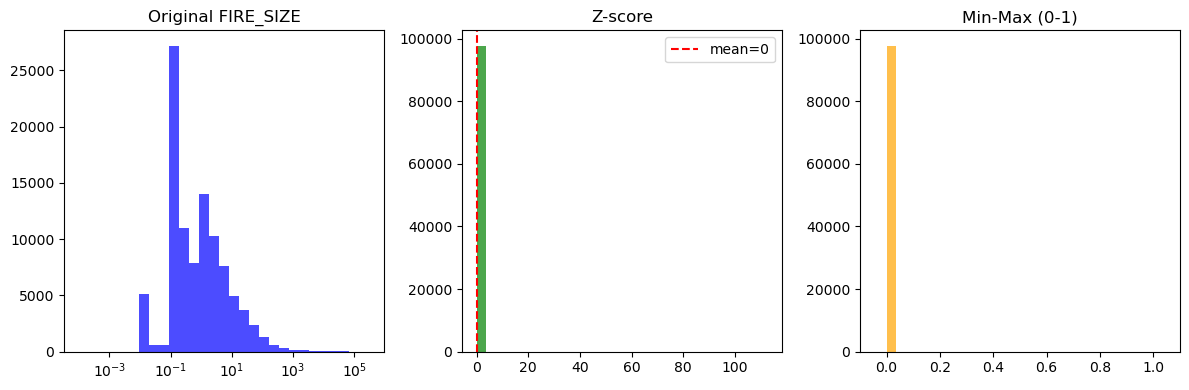

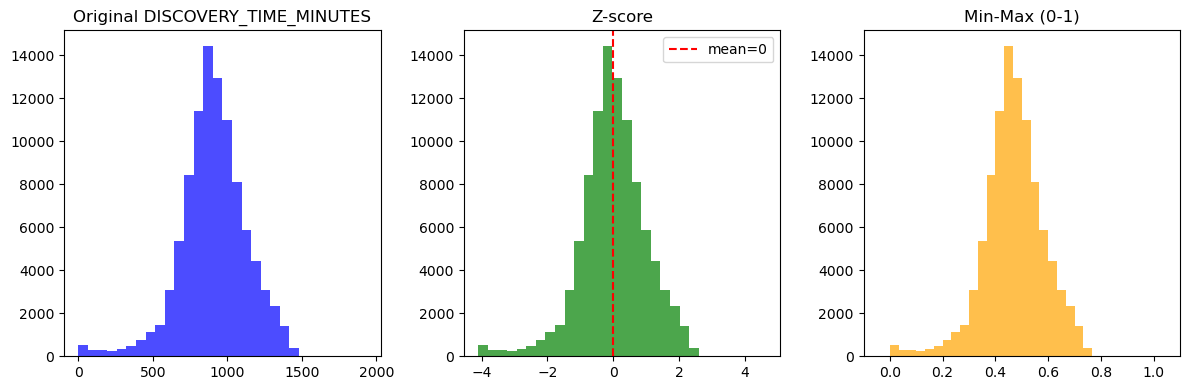

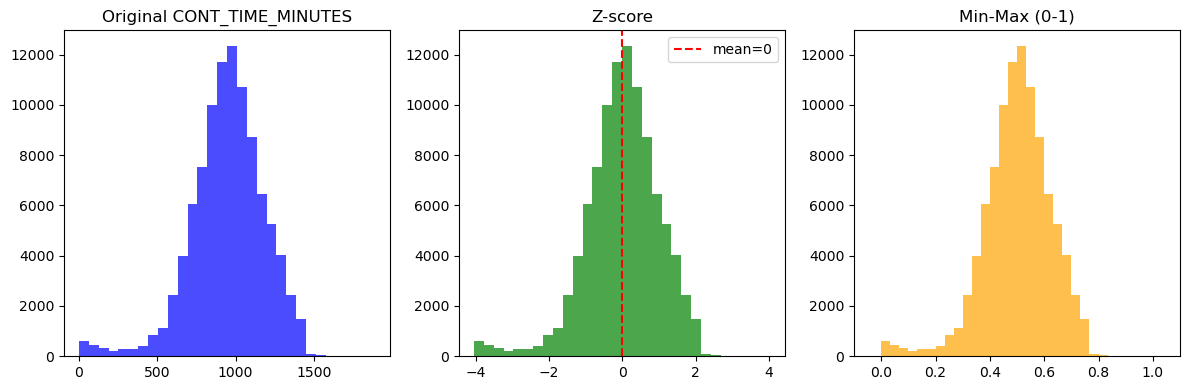

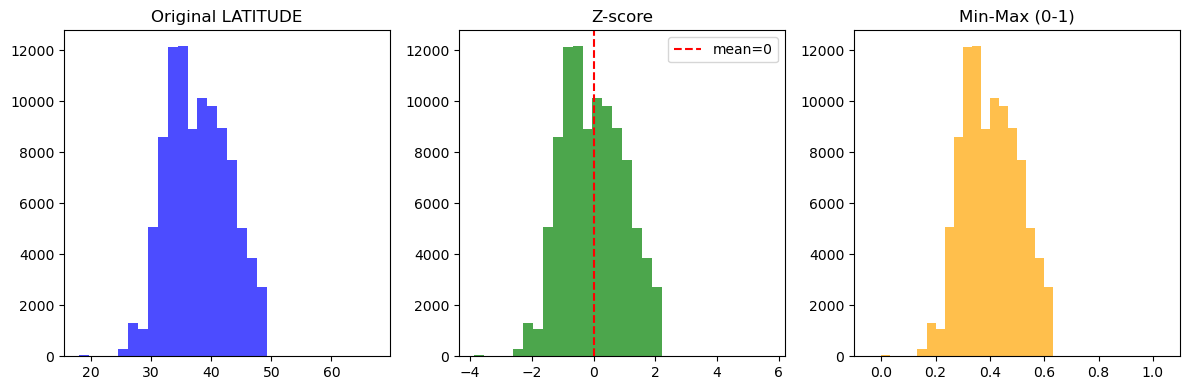

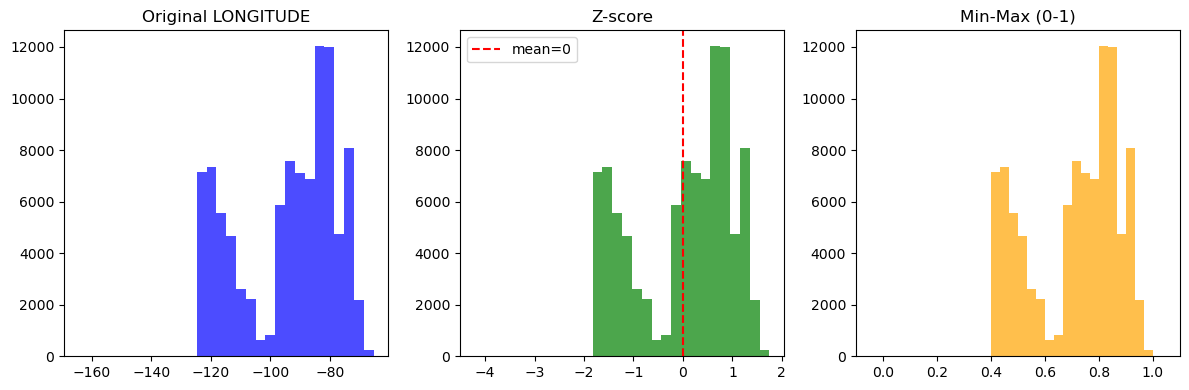

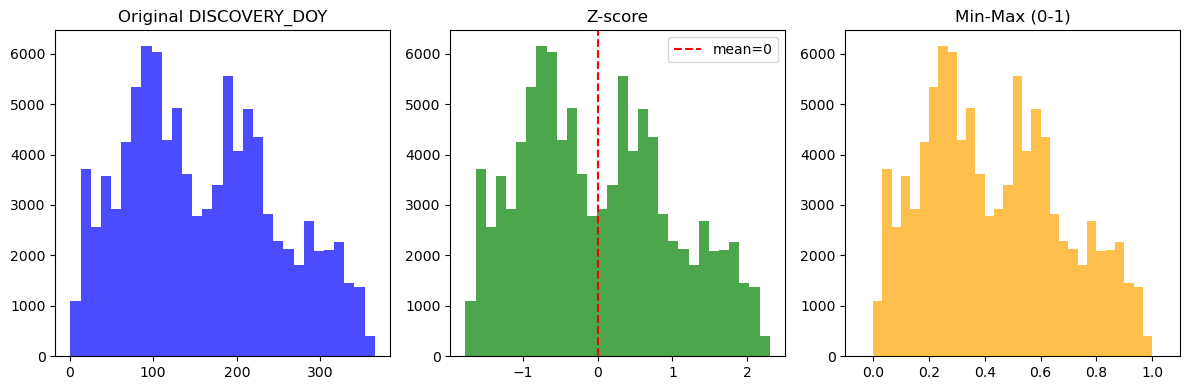

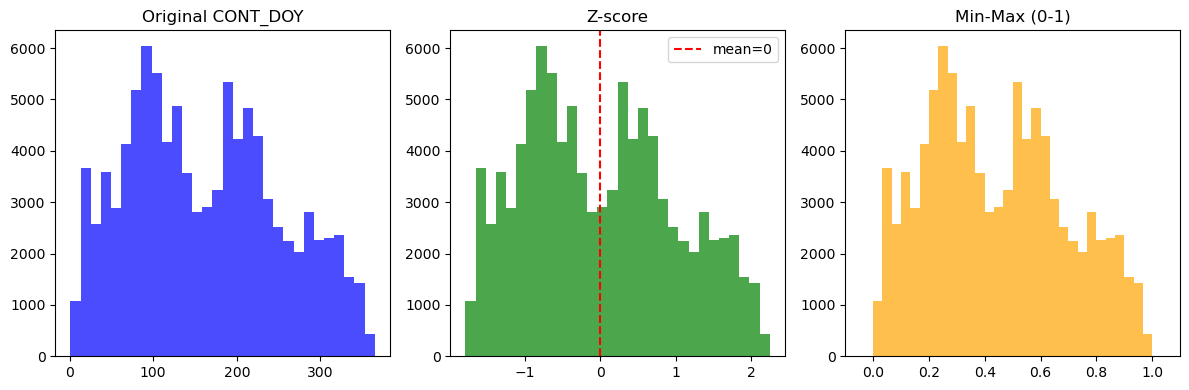

In [23]:
# Histogram for each feature
for feature in features_to_scale:
    plt.figure(figsize=(12, 4))

    if feature == 'FIRE_SIZE':
        # Add small epsilon to avoid log(0)
        bins = np.logspace(np.log10(df[feature].min() + 1e-9),
                           np.log10(df[feature].max()),
                           30)
    else:
        bins = 30

    # Original
    plt.subplot(1, 3, 1)
    plt.hist(df[feature], bins=bins, color='blue', alpha=0.7)
    plt.title(f'Original {feature}')
    if feature == 'FIRE_SIZE':
        plt.xscale('log')

    # Z-score
    plt.subplot(1, 3, 2)
    plt.hist(df[feature + '_std'], bins=30, color='green', alpha=0.7)
    plt.title('Z-score')
    plt.axvline(x=0, color='r', linestyle='--', label='mean=0')
    plt.legend()


    # Min-Max
    plt.subplot(1, 3, 3)
    plt.hist(df[feature + '_norm'], bins=30, color='orange', alpha=0.7)
    plt.title('Min-Max (0-1)')
    plt.xlim(-0.1, 1.1)

    plt.tight_layout()
    plt.show()

In [24]:
# Show skewness of the features we're scaling
print("Skewness of features:")
for feature in features_to_scale:
    print(f"{feature}: {df[feature].skew()}")

Skewness of features:
FIRE_SIZE: 74.20060514855425
DISCOVERY_TIME_MINUTES: -0.5318594710328636
CONT_TIME_MINUTES: -0.7247866496474478
LATITUDE: 0.2228294671819464
LONGITUDE: -0.5250011402367128
DISCOVERY_DOY: 0.2999613537653551
CONT_DOY: 0.2585637677206462


#### FIRE_SIZE
The original FIRE_SIZE distribution is extremely right-skewed with most values clustered near 0 and a long tail extending to large fires. The x-axis uses log scale (10⁻³ to 10⁵) to even visualize the spread.

Z-score is NOT ideal for FIRE_SIZE due to its extreme skew (74.20). The massive outliers distort both the mean and standard deviation, making the standardized values unhelpful.

Min-Max is also problematic for FIRE_SIZE. The orange plot shows nearly all data compressed at 0 because the maximum fire size is so large compared to typical fires.

---

#### DISCOVERY_TIME_MINUTES
The original DISCOVERY_TIME_MINUTES distribution is slightly left-skewed (skew: -0.53) with values ranging from 0 to approximately 1500 minutes, peaking around 800-1000 minutes.

Z-score works well for DISCOVERY_TIME_MINUTES due to its mild skew (-0.53) and approximately normal appearance. It preserves the distribution shape while standardizing the scale, making it suitable for combining with other features of different units. The standardized values reveal outliers (those beyond ±3) which represent unusually early or late fire discovery times.

Min-Max scaling is appropriate for DISCOVERY_TIME_MINUTES when bounded [0,1] values are needed. The scaled values are interpretable as relative discovery time (0 = earliest, 1 = latest). This works because there are no extreme outliers distorting the scale.

---

#### CONT_TIME_MINUTES
The original CONT_TIME_MINUTES distribution is slightly left-skewed (skew: -0.72) with values ranging from 0 to approximately 2000 minutes, peaking around 1000 minutes.

Z-score works well for CONT_TIME_MINUTES due to its mild skew (-0.72) and approximately normal appearance. It preserves the distribution shape while standardizing the scale, making it suitable for combining with other features. The standardized values reveal outliers (those beyond ±3) which represent unusually fast or slow containment times.

Min-Max scaling is appropriate for CONT_TIME_MINUTES when bounded [0,1] values are needed. The scaled values are interpretable as relative containment speed (0 = fastest containment, 1 = slowest). This works because there are no extreme outliers distorting the scale.

#### LATITUDE

The original LATITUDE distribution is roughly bell-shaped but slightly irregular, with the majority of values clustered between 30 and 50 degrees and a peak around 35-40.

Z-score works well for LATITUDE as it effectively centers the continental mass at 0 without being overly sensitive to the geographic outliers defining the boundaries.

Min-Max scaling is less effective here for visualizing the main distribution, as the outliers (likely Alaska or Hawaii) compress the continental US data into a small middle segment (0.2–0.6) rather than utilizing the full [0,1] range.

---

#### LONGITUDE

The original LONGITUDE distribution is distinctly bimodal (two separate peaks), representing the two major clusters of fire occurrences (likely Western vs. Eastern US) around -120 and -90.

Z-score is excellent for LONGITUDE because it respects the bimodal nature of the data while standardizing the scale, ensuring neither geographic cluster dominates the other in distance calculations.

Min-Max scaling again highlights the presence of extreme outliers (likely far-west coordinates like Hawaii or Alaska) which set the "0" point, causing the primary dataset to bunch up in the upper half of the scale.

---

#### DISCOVERY_DOY

The original DISCOVERY_DOY distribution is multimodal and broad, with distinct peaks around day 100 (Spring) and day 200 (Summer), and lower frequencies at the start/end of the year.

Z-score works well for DISCOVERY_DOY by centering the "average" fire date at 0, making it easy to identify fires that occurred unusually early or late in the season (tails of the distribution).

Min-Max scaling is highly effective for DISCOVERY_DOY as the data is naturally bounded (days 1-365) without extreme outliers, allowing the distribution to fill the [0,1] space meaningfully.

---

#### CONT_DOY

The original CONT_DOY distribution closely mirrors Discovery DOY, featuring a multimodal shape with peaks around day 100 and day 200.

Z-score is suitable for CONT_DOY, as it maintains the seasonal structure while standardizing the values for comparison with other features.

Min-Max scaling is also appropriate here, providing an intuitive "progress bar" of the fire season where 0 is the beginning of the year and 1 is the end.

For this wildfire dataset, Z-score is preferred because:

1. DISCOVERY_TIME_MINUTES and CONT_TIME_MINUTES are reasonably symmetric, whilst LATITUDE and LONGITUDE contain geographic outliers that distort Min-Max scaling (compressing the main data cluster).
2. The data doesn't have hard boundaries for most features, and Z-score better preserves the multimodal shapes of the coordinate and date (DOY) distributions.

The key insight remains that FIRE_SIZE (skewness = 74.20) fails with both methods, demonstrating when some kind of transformation (e.g. log) is required before scaling this data.

# 3️⃣ Handling Noise
- Choose one numerical feature

- Inject artificial noise

- Apply a smoothing technique (e.g. rolling mean)

- Show before vs after results

In [25]:
df['FIRE_SIZE'].describe()

count     97868.000000
mean         81.533916
std        2776.953503
min           0.000100
25%           0.100000
50%           0.500000
75%           3.000000
max      312918.300000
Name: FIRE_SIZE, dtype: float64

In [26]:
noise_std = 10  # Standard deviation of noise in acres

noise = np.random.normal(0, noise_std, size=len(df))

df['FIRE_SIZE_NOISY'] = df['FIRE_SIZE'] + noise

# Add clip to prevent negative values
df['FIRE_SIZE_NOISY'] = df['FIRE_SIZE_NOISY'].clip(lower=0.01)  # No negative sizes

df[['FIRE_SIZE','FIRE_SIZE_NOISY']].describe()

,FIRE_SIZE,FIRE_SIZE_NOISY
count,97868.000000,97868.000000
mean,81.533916,84.608092
std,2776.953503,2776.834974
min,0.000100,0.010000
25%,0.100000,0.010000
50%,0.500000,2.914543
75%,3.000000,11.125180
max,312918.300000,312912.479118


Added Gaussian noise with mean=0 and standard deviation=10 acres


- It is supposed to simulate measurement errors in fire size reporting
- Noise std=10 is small relative to overall data spread (std=2940) but noticeable on individual fires
- The median shifted from 0.5 → 2.76 acres due to noise affecting small values

In [27]:
# Moving Average
window_size = 5
df['FIRE_SIZE_MA'] = df['FIRE_SIZE_NOISY'].rolling(window=window_size, center=True).mean()

# Note that first 2 and last 2 values are NAN
print(df[['FIRE_SIZE_NOISY', 'FIRE_SIZE_MA']].head(10))

   FIRE_SIZE_NOISY  FIRE_SIZE_MA
0         0.010000           NaN
1         0.010000           NaN
2         0.010000      1.403538
3         6.977692      1.403538
4         0.010000      1.403538
5         0.010000      1.403538
6         0.010000      0.010000
7         0.010000      1.442801
8         0.010000      1.442801
9         7.174004      1.442801


Parameters:
- Window size = 5: Each value becomes average of itself + 2 neighbors before + 2 after
- center=True: Centers window on each point for balanced smoothing

In [28]:
# Smoothing by Aggregation
df['FIRE_SIZE_AGG'] = df.groupby('FIRE_SIZE_CLASS')['FIRE_SIZE_NOISY'].transform('mean')

# Show means used per class
df.groupby('FIRE_SIZE_CLASS')['FIRE_SIZE_NOISY'].mean()

FIRE_SIZE_CLASS
A        4.073937
B        5.274102
C       29.362962
D      162.786448
E      511.614327
F     2287.955443
G    32474.199562
Name: FIRE_SIZE_NOISY, dtype: float64

Why this choice:
- Fires already categorized by size (A = <0.25 acres, G = >5000 acres)
- FIRE_SIZE_CLASS chosen because it directly relates to the feature being smoothed

Other options would include: STATE, DISCOVERY_DOY, STAT_CAUSE_CODE

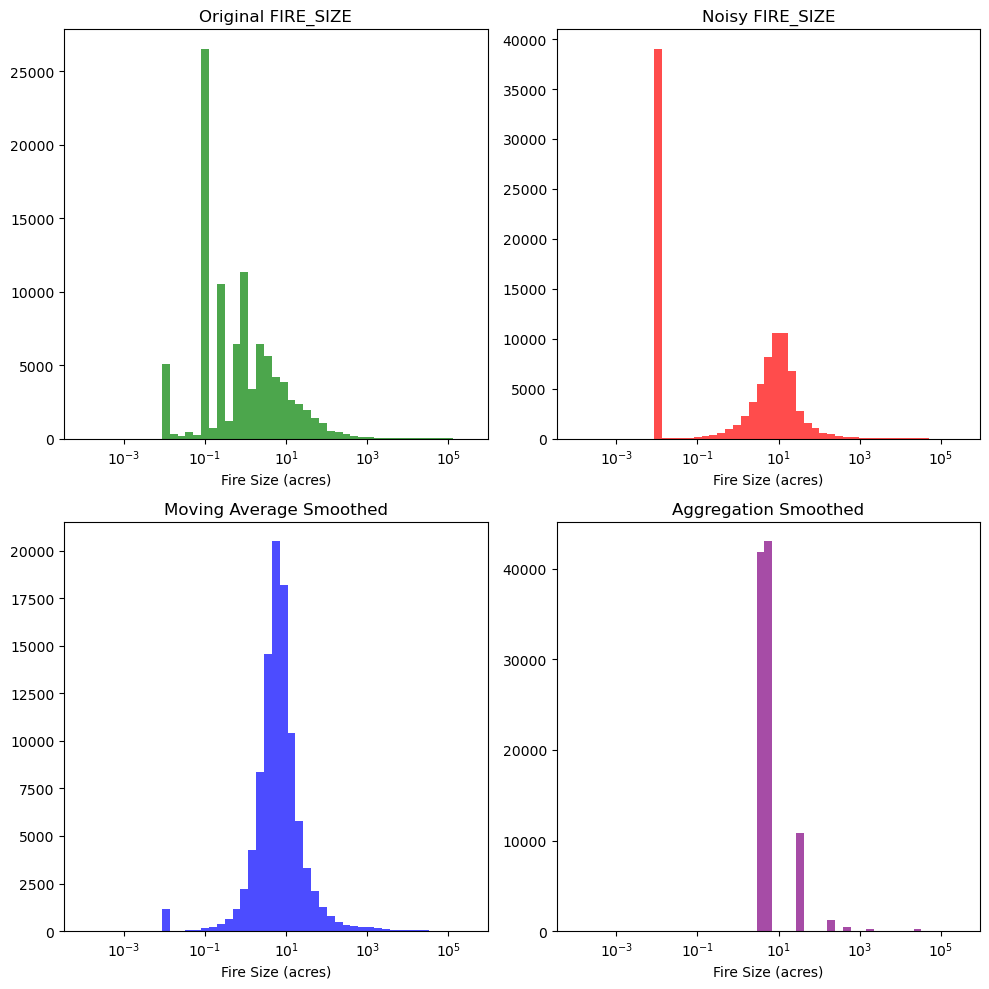

In [29]:
# Define log bins once at the top
log_bins = np.logspace(np.log10(min(df['FIRE_SIZE'].min(), df['FIRE_SIZE'].min())),
                       np.log10(max(df['FIRE_SIZE'].max(), df['FIRE_SIZE'].max())),
                       50)

plt.figure(figsize=(10, 10))

# Original
plt.subplot(2, 2, 1)
plt.hist(df['FIRE_SIZE'], bins=log_bins, color='green', alpha=0.7)
plt.title('Original FIRE_SIZE')
plt.xlabel('Fire Size (acres)')
plt.xscale('log')

# Noisy
plt.subplot(2, 2, 2)
plt.hist(df['FIRE_SIZE_NOISY'], bins=log_bins, color='red', alpha=0.7)
plt.title('Noisy FIRE_SIZE')
plt.xlabel('Fire Size (acres)')
plt.xscale('log')

# Moving Average
plt.subplot(2, 2, 3)
plt.hist(df['FIRE_SIZE_MA'].dropna(), bins=log_bins, color='blue', alpha=0.7)
plt.title('Moving Average Smoothed')
plt.xlabel('Fire Size (acres)')
plt.xscale('log')

# Aggregation
plt.subplot(2, 2, 4)
plt.hist(df['FIRE_SIZE_AGG'], bins=log_bins, color='purple', alpha=0.7)
plt.title('Aggregation Smoothed')
plt.xlabel('Fire Size (acres)')
plt.xscale('log')

plt.tight_layout()
plt.show()

- **Original vs Noisy:** Similar however we can see more smooth steps

- **Moving Average:** Smooths fluctuations, peak becomes narrower, preserves overall shape
- **Aggregation:** Creates 7 distinct spikes (fire classes A-G), loses individual variation

In [30]:
df[
    [ 'FIRE_SIZE',
      'FIRE_SIZE_NOISY',
     'FIRE_SIZE_MA',
     'FIRE_SIZE_AGG'
    ]].describe()

,FIRE_SIZE,FIRE_SIZE_NOISY,FIRE_SIZE_MA,FIRE_SIZE_AGG
count,97868.000000,97868.000000,97864.000000,97868.000000
mean,81.533916,84.608092,84.611462,84.608092
std,2776.953503,2776.834974,1356.369328,1474.471658
min,0.000100,0.010000,0.010000,4.073937
25%,0.100000,0.010000,3.499454,4.073937
50%,0.500000,2.914543,6.329508,5.274102
75%,3.000000,11.125180,11.453013,5.274102
max,312918.300000,312912.479118,81253.873650,32474.199562


- Noise increased mean slightly (81.5 → 84.6 acres) while standard deviation remained similar (~2776)

- Moving Average preserved the mean (84.6) while reducing std to 1356, smoothing fluctuations without distorting distribution

- Aggregation reduced std to 1474 but drastically changed median (0.50 → 5.26 acres), collapsing all fires into 7 class averages and losing individual variation

Moving Average is superior for this dataset as it reduces noise while maintaining the underlying distribution shape and individual fire characteristics.

In [31]:
# Drop Noisy Data
df = df.drop(columns=
 [  'FIRE_SIZE_NOISY',
    'FIRE_SIZE_MA',
    'FIRE_SIZE_AGG'
    ])

# 4️⃣ Handling Outliers
Detect outliers using Z-score

Handle them via removal or transformation

Justify your approach

In [32]:
from scipy.stats import zscore

## Fire Size Outliers

In [33]:
# Examine distribution
print("FIRE_SIZE statistics:")
print(df['FIRE_SIZE'].describe())

FIRE_SIZE statistics:
count     97868.000000
mean         81.533916
std        2776.953503
min           0.000100
25%           0.100000
50%           0.500000
75%           3.000000
max      312918.300000
Name: FIRE_SIZE, dtype: float64


In [34]:
# Calculate Z-score for CONT_DURATION
df['FIRE_SIZE_z'] = zscore(df['FIRE_SIZE'])

# Detect outliers (|z-score| > 3)
outliers_z = df[df['FIRE_SIZE_z'].abs() > 3]

print(f"Z-score outliers: {len(outliers_z)}")

Z-score outliers: 145


In [35]:
# IQR outlier detection
Q1 = df['FIRE_SIZE'].quantile(0.25)
Q3 = df['FIRE_SIZE'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = df[(df['FIRE_SIZE'] < lower) | (df['FIRE_SIZE'] > upper)]

print(f"\nIQR Method:")
print(f"Q1={Q1}, Q3={Q3}, IQR={IQR}")
print(f"Bounds: [{lower:.0f}, {upper:.0f}]")
print(f"Outliers detected: {len(outliers_iqr)} ({round(len(outliers_iqr)/len(df)*100, 1)}%)")


IQR Method:
Q1=0.1, Q3=3.0, IQR=2.9
Bounds: [-4, 7]
Outliers detected: 14566 (14.9%)


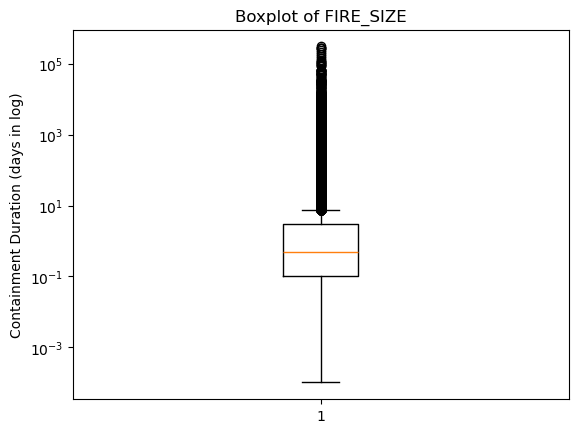

In [36]:
# Visualize outliers with boxplot
plt.boxplot([df['FIRE_SIZE']])
plt.yscale('log')
plt.ylabel('Containment Duration (days in log)')
plt.title('Boxplot of FIRE_SIZE')
plt.show()

I will keep all outliers without removal or transformation as Fire size follows a non Gaussian distribution where extreme values are inherent to the phenomenon, not errors.

In [37]:
# Drop temporary Z-score column
df = df.drop(columns=['FIRE_SIZE_z'])

# Potecial Alternative Apporches if the data should be changed
# If outlier removal were appropriate:
# df_no_outliers = df[df['FIRE_SIZE'] <= upper]

## Georgraphic Outliers


Z-score method (threshold: |z| > 3):
  Latitude outliers: 189 (0.19%)
  Longitude outliers: 92 (0.09%)
  Total geographic outliers: 189 (0.19%)

States flagged as outliers:
STATE
AK    119
PR     68
HI      2
Name: count, dtype: int64

IQR method:
  Geographic outliers: 189 (0.19%)


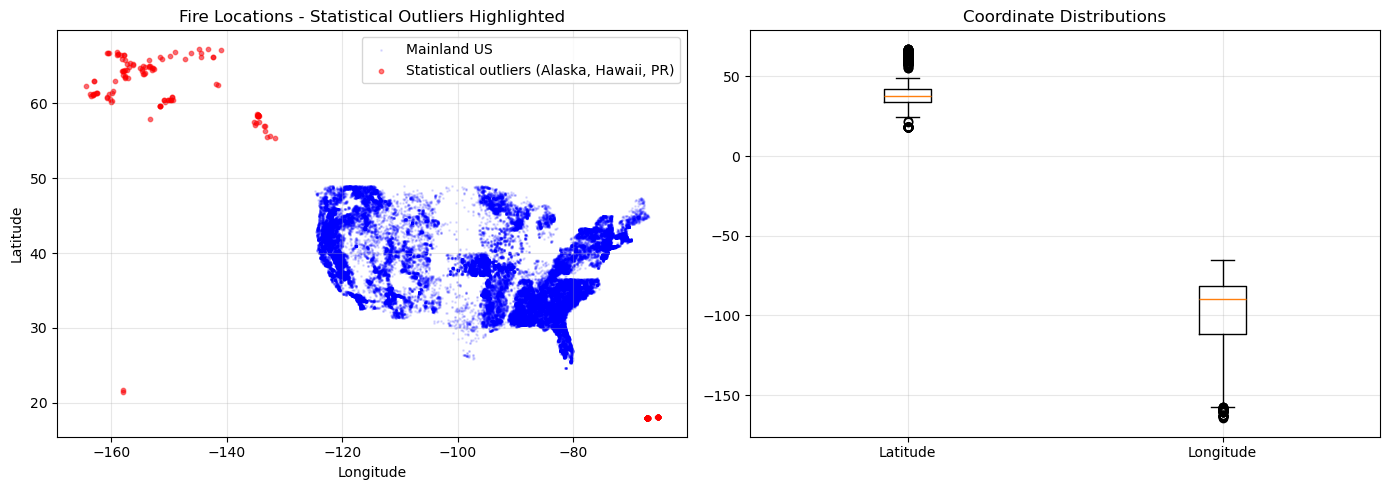

In [38]:
# Calculate Z-scores for coordinates
df['LATITUDE_z'] = zscore(df['LATITUDE'])
df['LONGITUDE_z'] = zscore(df['LONGITUDE'])

# Detect outliers (|z-score| > 3)
lat_outliers = df[df['LATITUDE_z'].abs() > 3]
lon_outliers = df[df['LONGITUDE_z'].abs() > 3]
geo_outliers = df[(df['LATITUDE_z'].abs() > 3) | (df['LONGITUDE_z'].abs() > 3)]

print(f"\nZ-score method (threshold: |z| > 3):")
print(f"  Latitude outliers: {len(lat_outliers)} ({len(lat_outliers)/len(df)*100:.2f}%)")
print(f"  Longitude outliers: {len(lon_outliers)} ({len(lon_outliers)/len(df)*100:.2f}%)")
print(f"  Total geographic outliers: {len(geo_outliers)} ({len(geo_outliers)/len(df)*100:.2f}%)")

# Show which states these are
if len(geo_outliers) > 0:
    print(f"\nStates flagged as outliers:")
    print(geo_outliers['STATE'].value_counts())

# IQR method for comparison
Q1_lat = df['LATITUDE'].quantile(0.25)
Q3_lat = df['LATITUDE'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
Q1_lon = df['LONGITUDE'].quantile(0.25)
Q3_lon = df['LONGITUDE'].quantile(0.75)
IQR_lon = Q3_lon - Q1_lon

iqr_outliers = df[
    (df['LATITUDE'] < Q1_lat - 1.5*IQR_lat) | (df['LATITUDE'] > Q3_lat + 1.5*IQR_lat) |
    (df['LONGITUDE'] < Q1_lon - 1.5*IQR_lon) | (df['LONGITUDE'] > Q3_lon + 1.5*IQR_lon)
]

print(f"\nIQR method:")
print(f"  Geographic outliers: {len(iqr_outliers)} ({len(iqr_outliers)/len(df)*100:.2f}%)")

# Visualise
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Map view with outliers highlighted
ax1.scatter(df['LONGITUDE'], df['LATITUDE'], alpha=0.1, s=1, c='blue', label='Mainland US')
if len(geo_outliers) > 0:
    ax1.scatter(geo_outliers['LONGITUDE'], geo_outliers['LATITUDE'],
                alpha=0.5, s=10, c='red', label='Statistical outliers (Alaska, Hawaii, PR)')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Fire Locations - Statistical Outliers Highlighted')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Boxplots showing outliers
ax2.boxplot([df['LATITUDE'], df['LONGITUDE']], tick_labels=['Latitude', 'Longitude'])
ax2.set_title('Coordinate Distributions')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Although Alaska, Hawaii, and Puerto Rico appear as statistical outliers due to their distance from the mainland US, these are legitimate US territories with genuine wildfire data. Unlike fire size outliers which represent extreme events, these geographic 'outliers' represent valid spatial variation across US territories. Removing them would exclude important regions from the analysis.

# 5️⃣ Feature Selection
Apply at least one of the following:

- Filter method (e.g. correlation, mutual information)

- Wrapper method (e.g. RFE)

- Embedded method (e.g. Lasso)

Explain why this method was chosen.

## Method 1: Filter Method (Correlation Analysis)

We chose **Pearson Correlation** as our filter method because it provides a quick, quantitative way to measure linear relationships between our numerical features.

This helps in two ways:
1.  It shows which features are most strongly associated with our target variable (`FIRE_SIZE`).
2.  It highlights features that are highly correlated with each other (multicollinearity). For example, if two time-based features provide nearly identical information, we can select just one to reduce model complexity and avoid overfitting.

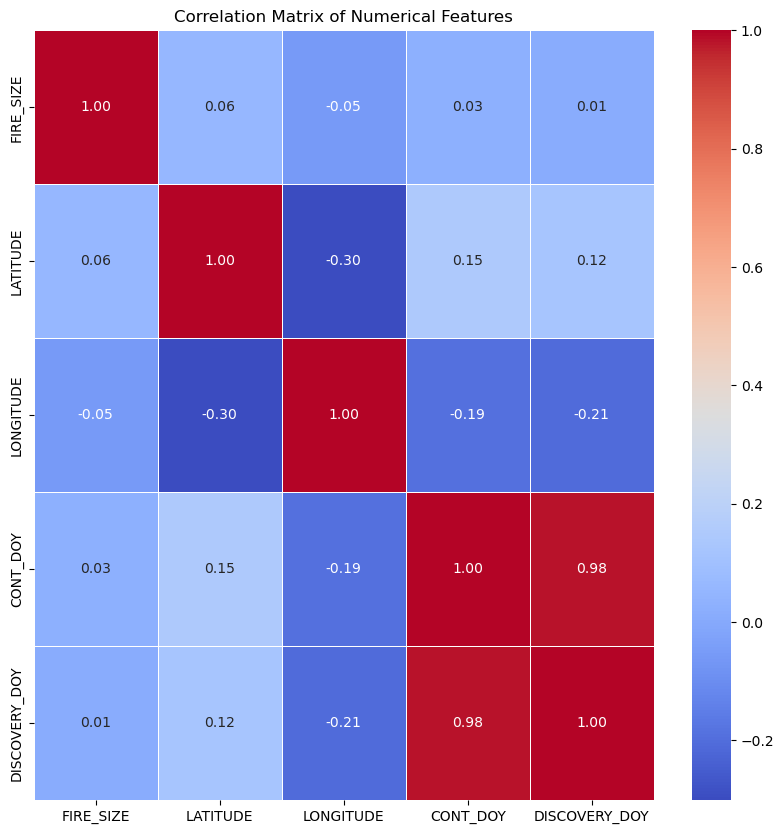

Correlation with Target (FIRE_SIZE):
FIRE_SIZE        1.000000
LATITUDE         0.059117
CONT_DOY         0.025507
DISCOVERY_DOY    0.009583
LONGITUDE       -0.053727
Name: FIRE_SIZE, dtype: float64
Correlation between DISCOVERY_DOY and CONT_DOY: 0.9809


In [39]:
# Select Numerical Features for Analysis
# We select the main continuous/numerical features available in the dataset
# 'FIRE_SIZE' is our target, while others are potential predictors

numeric_features = ['FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'CONT_DOY', 'DISCOVERY_DOY']

# Compute Correlation Matrix
# We calculate the correlation coefficients between all pairs of features
corr_matrix = df[numeric_features].corr()

# Visualize with a Heatmap
plt.figure(figsize=(10, 10))
# 'annot=True' shows the actual correlation values on the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Feature Selection Analysis
print("Correlation with Target (FIRE_SIZE):")
print(corr_matrix['FIRE_SIZE'].sort_values(ascending=False))

# Check the correlation between Discovery Day and Containment Day
doy_corr = corr_matrix.loc['DISCOVERY_DOY', 'CONT_DOY']
print(f"Correlation between DISCOVERY_DOY and CONT_DOY: {doy_corr:.4f}")

- 'DISCOVERY_DOY' and 'CONT_DOY' are extremely highly correlated.
- These features are redundant. A filter method would suggest keeping only 'DISCOVERY_DOY' (as it is known earlier) and dropping 'CONT_DOY' to avoid multicollinearity.

## Method 2: Recursive Feature Elimination (RFE)

We chose Recursive Feature Elimination (RFE) as our wrapper method because it evaluates feature importance based on actual model performance rather than simple statistical relationships.

This helps in two ways:
- RFE repeatedly trains a regression model and ranks features according to their contribution to predicting the target variable (FIRE_SIZE), ensuring that only the most informative predictors are retained.
- Unlike filter methods, RFE considers how features work together within the model. By iteratively removing the least important features, it helps identify an optimal subset of predictors while reducing model complexity and the risk of overfitting.

### Step 1: Define features and target

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y = df['FIRE_SIZE']

X = df[['LATITUDE_std',
        'LONGITUDE_std',
        'DISCOVERY_DOY_std',
        'CONT_DOY_std']]


### Step 2: Apply RFE

In [41]:
# Setup the model and RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=2)

# Fit the RFE
rfe.fit(X, y)

,"estimator estimator: ``Estimator`` instanceA supervised learning estimator with a ``fit`` method that providesinformation about feature importance(e.g. `coef_`, `feature_importances_`).",LinearRegression()
,"n_features_to_select n_features_to_select: int or float, default=NoneThe number of features to select. If `None`, half of the features areselected. If integer, the parameter is the absolute number of featuresto select. If float between 0 and 1, it is the fraction of features toselect... versionchanged:: 0.24 Added float values for fractions.",2
,"step step: int or float, default=1If greater than or equal to 1, then ``step`` corresponds to the(integer) number of features to remove at each iteration.If within (0.0, 1.0), then ``step`` corresponds to the percentage(rounded down) of features to remove at each iteration.",1
,"verbose verbose: int, default=0Controls verbosity of output.",0
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a `coef_`or `feature_importances_` attributes of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case ofclass:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


We first reduce the model to two variables for interpretability and simplicity.

### Step 3: Inspect results

In [42]:
# Create the ranking summary
ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe.ranking_,
    'Selected': rfe.support_
})

# Sort it so the remaining features (Rank 1) are at the top
ranking_df = ranking_df.sort_values(by='Rank')

ranking_df

,Feature,Rank,Selected
2,DISCOVERY_DOY_std,1,True
3,CONT_DOY_std,1,True
1,LONGITUDE_std,2,False
0,LATITUDE_std,3,False


In the context of a linear model, the timing of the fire (discovery and containment dates) has a stronger linear relationship with the resulting fire size than the specific geographic coordinates.

## Method 3: Lasso Regression
We chose Lasso regression as our embedded feature selection method because it performs feature selection automatically during model training using L1 regularization.

This helps in two ways:
- Lasso penalizes less important features by shrinking their coefficients to zero, allowing us to clearly identify which variables contribute most to predicting FIRE_SIZE.
- By eliminating irrelevant or redundant features, Lasso reduces model complexity and improves generalization performance, particularly in the presence of correlated predictors such as geographic and temporal variables.

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X, y)

lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

print("Lasso coefficients:")
print(lasso_coefficients)

print("\nSelected features:")
print(lasso_coefficients[lasso_coefficients != 0])

Lasso coefficients:
LATITUDE_std           92.152159
LONGITUDE_std        -135.883193
DISCOVERY_DOY_std   -1095.266137
CONT_DOY_std         1104.374818
dtype: float64

Selected features:
LATITUDE_std           92.152159
LONGITUDE_std        -135.883193
DISCOVERY_DOY_std   -1095.266137
CONT_DOY_std         1104.374818
dtype: float64


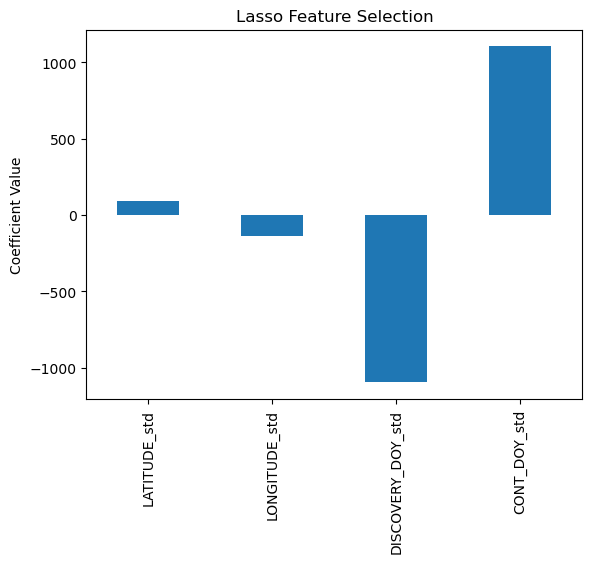

In [44]:
lasso_coefficients.plot(kind='bar', title='Lasso Feature Selection')
plt.ylabel('Coefficient Value')
plt.show()

The Lasso regression indicates that temporal factors are the primary drivers of FIRE_SIZE, with geographic location playing a significantly smaller role.

- The temporal features (CONT_DOY_std and DISCOVERY_DOY_std) have coefficients roughly ten times larger than the geographic variables, showing they have the strongest influence on the model.

- The large negative coefficient for DISCOVERY_DOY_std (-1095) it indicates a strong inverse relationship with CONT_DOY_std (+1104).

- Because the coefficients for containment and discovery are nearly equal in magnitude but opposite in sign, the model is effectively measuring the duration of the fire (Containment Day - Discovery Day). A larger gap between these two dates is the strongest predictor of a larger fire size.

- LATITUDE_std and LONGITUDE_std have much smaller coefficients (92 and -135), suggesting that while they contribute to the model, the fire's location is far less predictive than how long it burned.